In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


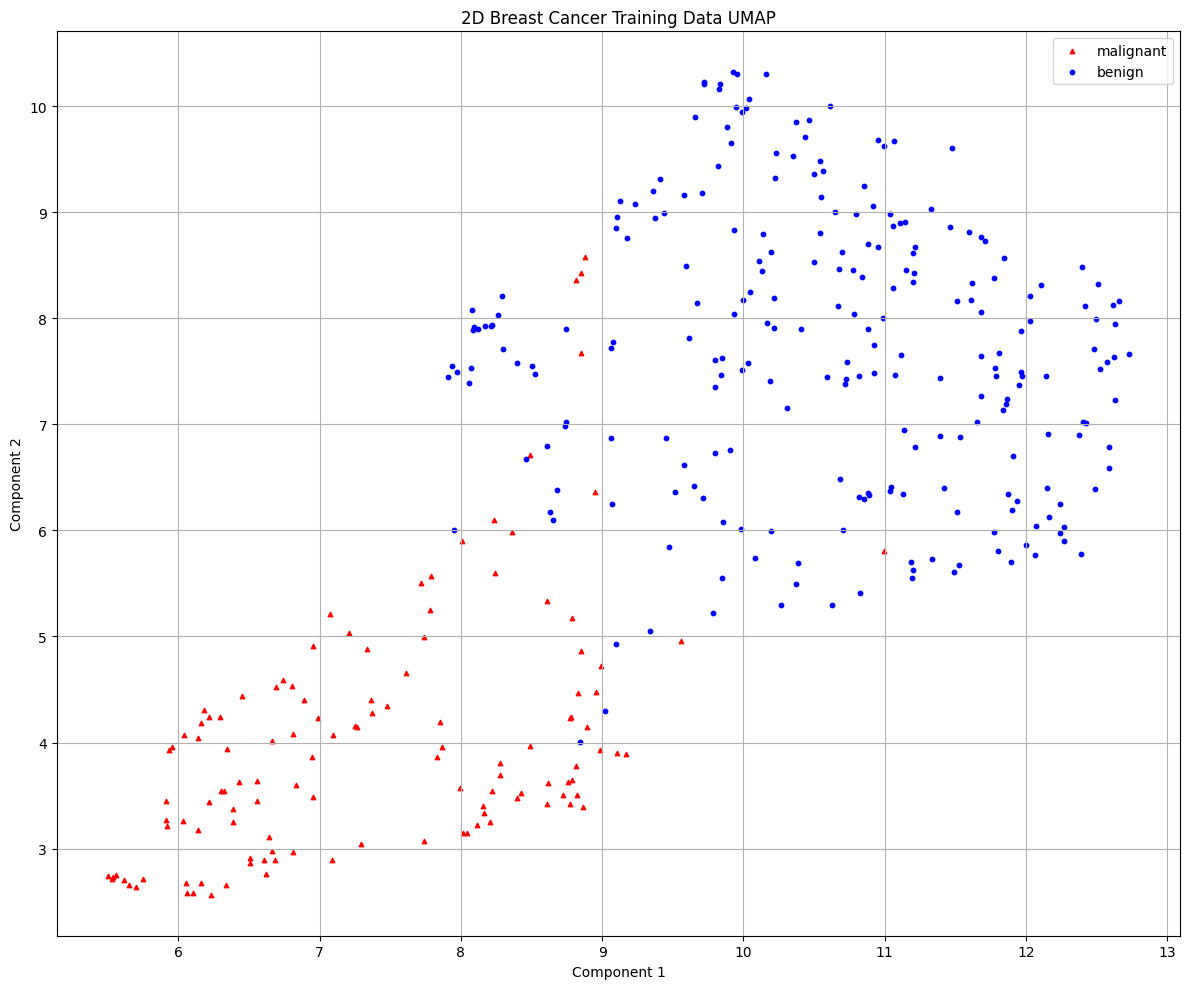

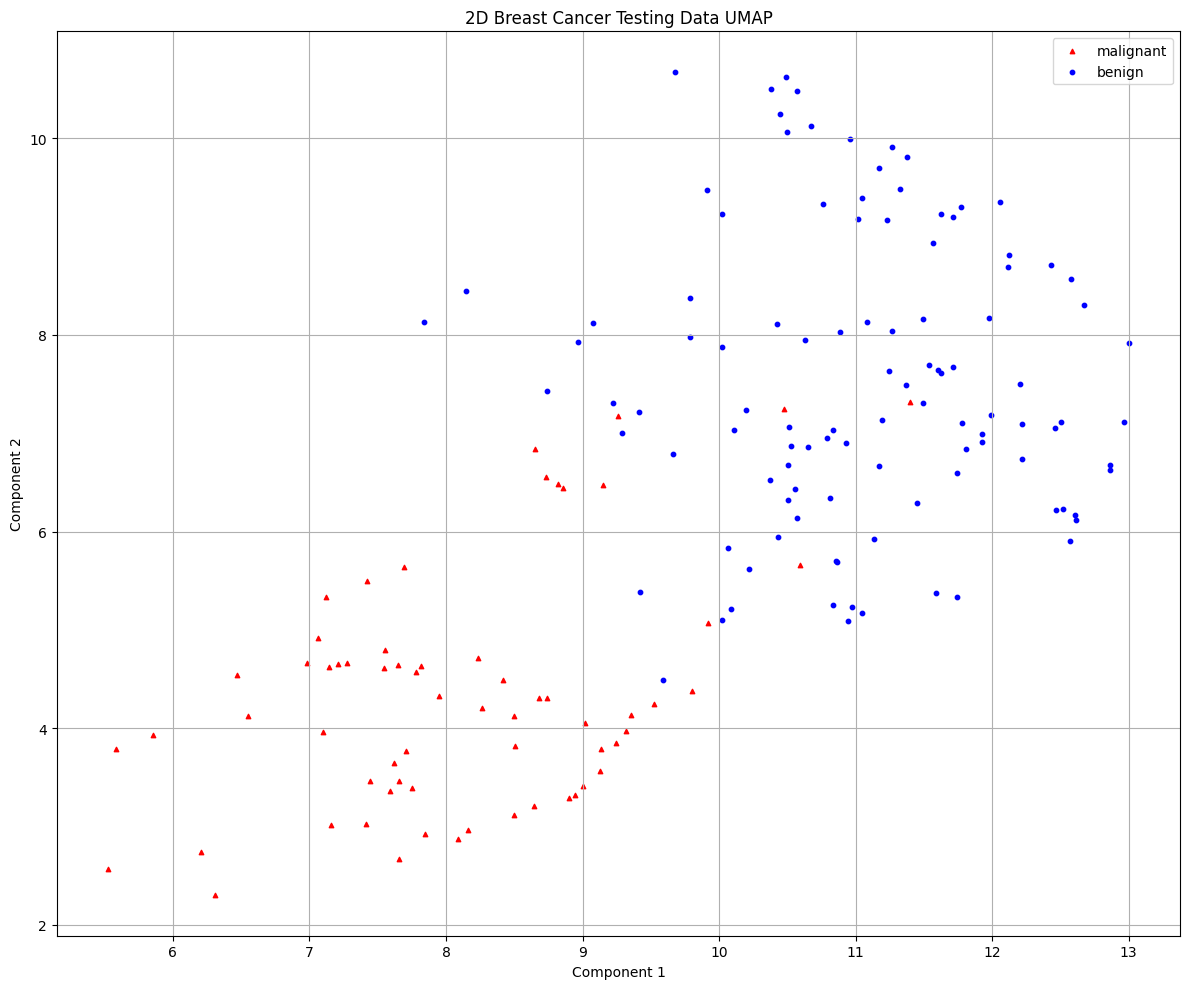

[I 2025-04-27 10:42:20,129] A new study created in memory with name: no-name-61f6acfd-4a3b-4ec0-b073-cc7ca8aba046
[I 2025-04-27 10:42:20,673] Trial 0 finished with value: 0.9724505327245053 and parameters: {'n_estimators': 111, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9724505327245053.
[I 2025-04-27 10:42:23,654] Trial 1 finished with value: 0.9474505327245053 and parameters: {'n_estimators': 770, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9724505327245053.
[I 2025-04-27 10:42:25,341] Trial 2 finished with value: 0.9557077625570777 and parameters: {'n_estimators': 385, 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.9724505327245053.
[I 2025-04-27 10:42:27,389] Trial 3 finished with value: 0.9558599695585996 and parameters: {'n_estimators': 535, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 9}. Best is trial 0 with va

Best trial:
Accuracy: 0.9779680365296803
Best hyperparameters:  {'n_estimators': 175, 'max_depth': 31, 'min_samples_split': 13, 'min_samples_leaf': 1}


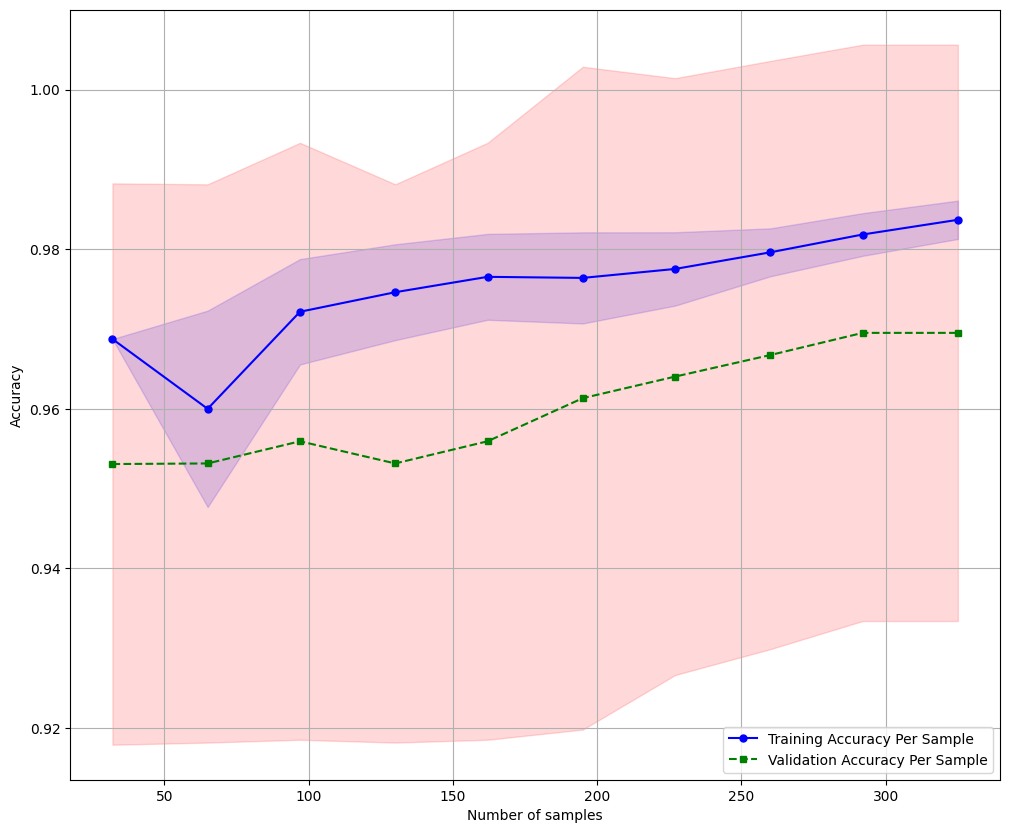

Confusion Matrix
[[ 55   9]
 [  1 106]]
Accuracy: 0.9415, Precision: 0.9217, Recall: 0.9907, F1: 0.9550, AUC: 0.9642


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)